# Розпізнавання об'єктів на зображеннях з набору даних CIFAR-10


Для того щоб редагувати код, збережіть копію цього ноутбука собі (File->Save a copy in Drive...). Свою копію ви зможете змінювати та запускати.


In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import utils
from keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Розмір міні-вибірки
batch_size = 128
# Кількість класів зображень
nb_classes = 10
# Кількість епох для навчання
nb_epoch = 25
# Розмір зображеннь
img_rows, img_cols = 32, 32
# Кількість каналів в зображенні
img_channels = 3
# Назви класівз набору даних  CIFAR-10
classes=['літак', 'автомобіль', 'птах', 'кіт', 'олень', 'собака', 'жаба', 'кінь', 'корабель', 'вантажівка']

## Підготовка даних

**Завантажуємо дані**

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


**Перагляд прикладів даних**

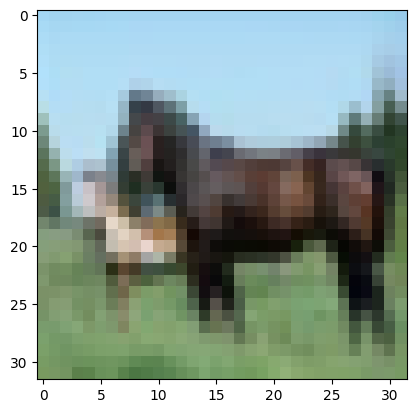

Номер класу: [7]
Тип об'єкту: кінь


In [4]:
n = 12
plt.imshow(X_train[n])
plt.show()
print("Номер класу:", y_train[n])
print("Тип об'єкту:", classes[y_train[n][0]])

**Нормалізуємо  дані**

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Перетворюємо вірні відповіді в формат one hot encoding**

In [6]:
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

## Створюємо нейронну мережу

In [33]:
from keras.layers import BatchNormalization
# Створюємо послідовну модель
model = Sequential()

# Перший згортковий шар
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(BatchNormalization())  # Додано Batch Normalization

# Другий згортковий шар
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())  # Додано Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Третій згортковий шар
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())  # Додано Batch Normalization

# Четвертий згортковий шар
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Додано Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Шар перетворення даних з 2D представлення в пласке
model.add(Flatten())

# Повнозв'язаний шар для класифікації
model.add(Dense(256, activation='relu'))  # Зменшено кількість нейронів
model.add(Dropout(0.4))  # Зменшено ймовірність Dropout

# Вихідний Повнозв'язаний шар
model.add(Dense(nb_classes, activation='softmax'))


**Друкуємо інформацію щодо мережі**

In [34]:
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         803,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 871,978 (3.33 MB)

 Trainable params: 871,594 (3.32 MB)

 Non-trainable params: 384 (1.50 KB)

None


**Компілюємо модель**

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



## Навчаємо нейрону мережу

In [36]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)


Epoch 1/25
352/352 - 17s - 48ms/step - accuracy: 0.4186 - loss: 1.6426 - val_accuracy: 0.2182 - val_loss: 2.7884
Epoch 2/25
352/352 - 3s - 10ms/step - accuracy: 0.5693 - loss: 1.2032 - val_accuracy: 0.6172 - val_loss: 1.0716
Epoch 3/25
352/352 - 3s - 10ms/step - accuracy: 0.6448 - loss: 1.0023 - val_accuracy: 0.6622 - val_loss: 0.9764
Epoch 4/25
352/352 - 5s - 15ms/step - accuracy: 0.6885 - loss: 0.8886 - val_accuracy: 0.7282 - val_loss: 0.7938
Epoch 5/25
352/352 - 5s - 14ms/step - accuracy: 0.7172 - loss: 0.7983 - val_accuracy: 0.7248 - val_loss: 0.8061
Epoch 6/25
352/352 - 5s - 15ms/step - accuracy: 0.7434 - loss: 0.7369 - val_accuracy: 0.7612 - val_loss: 0.7000
Epoch 7/25
352/352 - 5s - 14ms/step - accuracy: 0.7579 - loss: 0.6861 - val_accuracy: 0.7742 - val_loss: 0.6661
Epoch 8/25
352/352 - 3s - 10ms/step - accuracy: 0.7755 - loss: 0.6348 - val_accuracy: 0.7674 - val_loss: 0.7167
Epoch 9/25
352/352 - 4s - 10ms/step - accuracy: 0.7931 - loss: 0.5922 - val_accuracy: 0.7880 - val_loss

## Оцінюємо якість  навчання мережі

In [37]:
# Оцінюємо якість навчання моделі на тестових даних
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точність роботи на тестових даних: %.2f%%" % (scores[1]*100))

Точність роботи на тестових даних: 81.24%


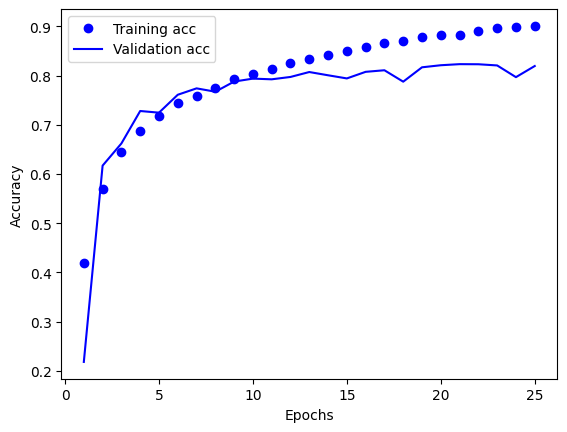

In [38]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

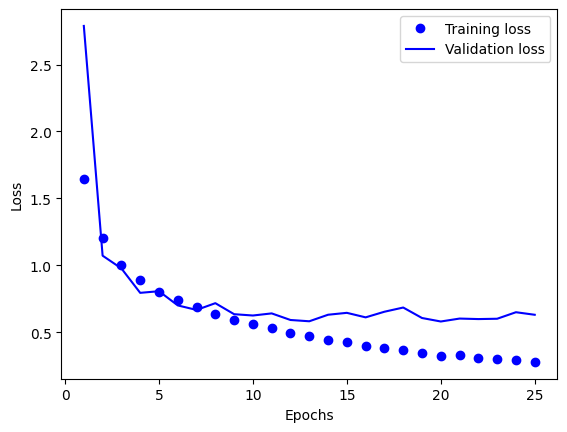

In [39]:
# Отримати історію втрат
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Визначити епохи
epochs = range(1, len(loss_values) + 1)

# Створити графік втрат
plt.figure()
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Зберігаємо навчену нейрону мережу

In [42]:
# Зберегти архітектуру моделі в JSON
model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()

# Зберегти ваги моделі з правильним розширенням
model.save_weights("cifar10_model_weights.weights.h5")


In [43]:
!ls

cifar10_model.json  cifar10_model_weights.weights.h5  sample_data


In [44]:
from google.colab import files

In [45]:
files.download("cifar10_model.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
files.download("cifar10_model_weights.weights.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Застосовуємо мережу для розпізнавання об'єктів на зображеннях

**Перегляд зображення з набору даних для тестування**

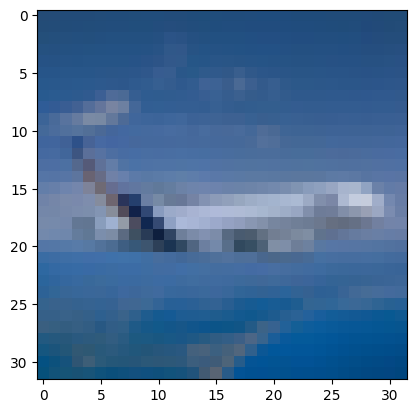

In [87]:
index=1712
plt.imshow(X_test[index])
plt.show()

**Перетворення тестового зображення**

In [88]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

**Запуск распізнавання**

In [89]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


**Друкуємо результати розпізнавання**

In [90]:
print(prediction)

[[9.9994874e-01 7.6372754e-12 4.8852889e-06 1.2900169e-09 2.5507723e-07
  3.8872117e-13 7.3681494e-10 5.1893335e-14 4.6157125e-05 3.5230235e-11]]


**Перетворюємо результати з формату one hot encoding**

In [91]:
prediction = np.argmax(prediction)
print(classes[prediction])

літак


**Друкуємо вірну відповідь**

In [92]:
print(classes[y_test[index][0]])

літак


## Розпізнаємо додаткове зображення

In [160]:
files.upload()

Saving truck1.jpg to truck1.jpg


{'truck1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xe1\x00VExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x04\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00>\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00F\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x02\x13\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01,\x00\x00\x00\x01\x00\x00\x01,\x00\x00\x00\x01\xff\xed\x00,Photoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x0f\x1c\x01Z\x00\x03\x1b%G\x1c\x01\x00\x00\x02\x00\x04\x00\xff\xe1\x0c\x81http://ns.adobe.com/xap/1.0/\x00<?xpacket begin=\'\xef\xbb\xbf\' id=\'W5M0MpCehiHzreSzNTczkc9d\'?>\n<x:xmpmeta xmlns:x=\'adobe:ns:meta/\' x:xmptk=\'Image::ExifTool 10.10\'>\n<rdf:RDF xmlns:rdf=\'http://www.w3.org/1999/02/22-rdf-syntax-ns#\'>\n\n <rdf:Description rdf:about=\'\'\n  xmlns:tiff=\'http://ns.adobe.com/tiff/1.0/\'>\n  <tiff:ResolutionUnit>2</tiff:ResolutionUnit>\n  <tiff:XResolution>300/1</tiff:XResolution>\n  <tiff:YResolution>300/1</tiff:YResolution>\n </

Перевіряємо завантаження файлів

In [161]:
!ls

 bird.jpg   cifar10_model.json		       dogs.jpg    plane.jpg	 truck1.jpg	  олень.jpg
 car.jpg    cifar10_model_weights.weights.h5   frog.jpg    sample_data	'truck (1).jpg'
 cat.jpg    dog.jpg			       horse.jpg   ship.jpg	 truck.jpg


**Дивимось завантажений малюнок**

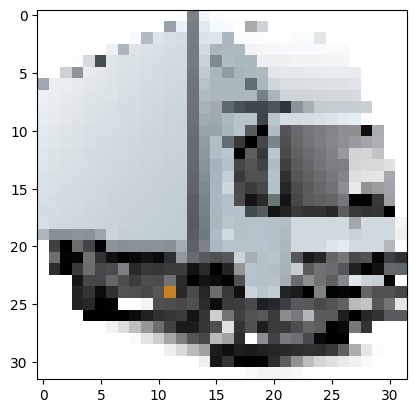

In [162]:
img_path = 'truck1.jpg'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

**Перетворюємо малюнок в масив для розпізнавання**

In [163]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

**Запускаємо розпізнавання**

In [164]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
вантажівка
